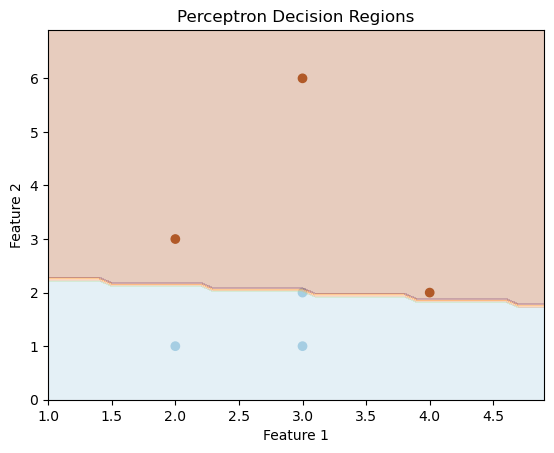

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, num_epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation >= 0 else 0

    def train(self, training_data, labels):
        for _ in range(self.num_epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Define the training data and labels
training_data = np.array([[2, 1], [3, 2], [3, 1], [2, 3], [4, 2], [3, 6]])
labels = np.array([0, 0, 0, 1, 1, 1])

# Create a perceptron object
perceptron = Perceptron(input_size=2)

# Train the perceptron
perceptron.train(training_data, labels)

# Generate a meshgrid to visualize the decision regions
x_min, x_max = training_data[:, 0].min() - 1, training_data[:, 0].max() + 1
y_min, y_max = training_data[:, 1].min() - 1, training_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the grid points
predictions = np.array([perceptron.predict(point) for point in grid_points])

# Reshape the predictions to match the grid shape
predictions = predictions.reshape(xx.shape)

# Plot the training data and decision regions
plt.figure()
plt.scatter(training_data[:, 0], training_data[:, 1], c=labels, cmap=plt.cm.Paired)
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()
